# How to load the Data

Software setup:

```bash
conda create --name tool-tracking_env python=3.12
conda activate tool-tracking_env
pip install -r requirements.txt
jupyter notebook
```

## 0. Structure of Tool Tracking Data

You have one dedicated folder for each __(hand) tool__. On the next level are folders for each __measurement campaign__. The undermost level contains all __measurements__ of the corresponding measurement campaign.

The preferred way to access the data for analysis and learning is using the `data-tools` package which is part of this repository.

![data_structure](./info/structure_scheme.jpg)

## 1. Load Data with `data-tools`

First we have to connect to our downloaded data using the main class:

In [1]:
from pathlib import Path
from datatools.fixture import setup_dummy_data
# test_tool
# source = setup_dummy_data(5)

# put data into this source folder
source = "./tool-tracking-data/"

In [2]:
from datatools import MeasurementDataReader, Measurement, MeasurementSeries, Action
mdr = MeasurementDataReader(source=source)

### 1.1 Create a Query to load _Measurements_ or _Actions_

Using the `mdr` object we can create a `Query` object to formulate a query to the data source.

In [3]:
q = mdr.query(query_type=Measurement)

Depending on the use case you can query for _Measurements_ which represents a temporal contiguous time series with inhomogeneous labels or _Actions_ which are parts of _Measurements_ but have the same label throughout their time range:

```python
from datatools import Action
q = mdr.query(query_type=Action)
```

### 1.2 Narrow a Query to load _Measurements_ of interest

In [4]:
from datatools import Tool, Config, MeasurementSeries, Measurement, DataTypes, Action
from datatools import ACC, GYR, MAG, MIC, POS, VEL

mytool = "electric_screwdriver"
#mytool = "pneumatic_screwdriver"
#mytool = "pneumatic_rivet_gun"
#mytool = "test_tool"

data_dict = q.filter_by(Tool == mytool, DataTypes == ACC).get()

[INFO] Preparing data from:
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716


[INFO] Read data:  12%|█▎        | 2/16 [00:00<00:01, 13.95it/s, file=ACC-02-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-01-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-02-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  25%|██▌       | 4/16 [00:00<00:00, 15.00it/s, file=ACC-04-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-03-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-04-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read annotation: 100%|██████████| 16/16 [00:00<00:00, 42.31it/s, file=data-04.annotation]

[INFO] Finished with 4 measurement(s).


In [5]:
data_dict.keys()  # we have loaded five measurements 

dict_keys(['01', '02', '03', '04'])

In [6]:
data_bunch = data_dict["01"] # data bunch for measurement with measurement id "01"
type(data_bunch)  

datatools.data.DataBunch

### 1.3 Interaction with the `DataBunch` class

A DataBunch object is a dictionary-like object that exposes its keys as attributes. Access the data with `data_bunch.acc` or `data_bunch['audio']`. You can inspect which data is contained with:

In [7]:
data_bunch.data_keys()

['acc']

In [8]:
data_bunch.acc.features

['acceleration x-axis [m/s^2]',
 'acceleration y-axis [m/s^2]',
 'acceleration z-axis [m/s^2]']

In [9]:
# matrix with raw sensor data with time column
Xt = data_bunch.acc.ts # numpy array

# matrix with raw sensor data (without time column)
X = data_bunch.acc.X  # numpy array

# target vector
y = data_bunch.acc.y  # numpy array

In [10]:
print("shape of Xt: ", Xt.shape) # timestamp,x,y,z axis values
print("shape of X: ", X.shape) # x,y,z axis values
print("shape of y: ", y.shape) # numeric label

print(Xt[0])
print(X[0])
print(y[0])

shape of Xt:  (41775, 4)
shape of X:  (41775, 3)
shape of y:  (41775,)
[ 1.59422628e+09 -5.87737800e+00  1.32205100e+00  8.61249100e+00]
[-5.877378  1.322051  8.612491]
8.0


### 1.4 Narrow a Query to load _Actions_ of interest

In [11]:
data_dict = mdr.query(query_type=Action).filter_by(Action == "tightening", Tool == mytool).get()

[INFO] Preparing data from:
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716


[INFO] Read data:  12%|█▎        | 2/16 [00:00<00:00, 14.85it/s, file=ACC-02-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-01-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-02-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-03-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  31%|███▏      | 5/16 [00:00<00:00, 18.24it/s, file=GYR-01-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-04-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-01-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  44%|████▍     | 7/16 [00:00<00:00, 17.23it/s, file=GYR-03-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-02-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-03-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  56%|█████▋    | 9/16 [00:00<00:00, 17.43it/s, file=MAG-01-155.087.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-04-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-01-155.087.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-02-154.679.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  69%|██████▉   | 11/16 [00:00<00:00, 14.88it/s, file=MAG-03-154.871.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-03-154.871.csv) and from the timestamps differ by 0.002Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-04-154.967.csv) and from the timestamps differ by 0.001Hz



[INFO] Read annotation: 100%|██████████| 16/16 [00:04<00:00,  3.35it/s, file=data-04.annotation]


[INFO] Finished with 79 action(s).


In [12]:
data_dict.keys()  # the data is now grouped by actions

dict_keys(['tightening'])

In [13]:
data_bunches = data_dict["tightening"]
print(f"{type(data_bunches)} of {type(data_bunches[0])}")
print(data_bunches[0]["classes"])
display(data_bunches[4])

<class 'list'> of <class 'datatools.data.DataBunch'>
{2: 'tightening'}


{'acc':           time [s]  acceleration x-axis [m/s^2]  acceleration y-axis [m/s^2]  \
 5254  1.594226e+09                    -0.164117                    -0.838661   
 5255  1.594226e+09                    -0.295868                     0.436615   
 5256  1.594226e+09                    -0.021070                     0.658845   
 5257  1.594226e+09                     0.625163                     0.496968   
 5258  1.594226e+09                     1.231298                     0.178809   
 ...            ...                          ...                          ...   
 5506  1.594226e+09                   -14.145749                    -7.317925   
 5507  1.594226e+09                   -10.613349                   -15.459874   
 5508  1.594226e+09                    -5.466820                   -10.372306   
 5509  1.594226e+09                     2.025146                   -10.313171   
 5510  1.594226e+09                     0.130272                    -8.867621   
 
       acceleration

## 2. Create windowed Time-Series

In [14]:
import numpy as np
from seglearn.base import TS_Data
from seglearn.pipe import Pype
from fhgutils import Segment, contextual_recarray_dtype, filter_ts_data
from datatools import to_ts_data

> Note: `to_ts_data` can deal with the output when querying _Measurements_ as well as _Actions_

Have a look on the seglearn [user guide](https://dmbee.github.io/seglearn/user_guide.html) to understand the data representation with `Xt` and `Xc`.

In [15]:
window_length=0.4 # unit in s
overlap = 0.5 # unit in percent

# clean and window data
data_dict = mdr.query().filter_by(Tool == mytool).get()
Xt, Xc, y = to_ts_data(data_dict, contextual_recarray_dtype)

X = TS_Data(Xt, Xc)
pipe = Pype([
    ('segment', Segment(window_length=window_length, overlap=overlap, enforce_size=True, n=len(np.unique(Xc.desc))))
])

X_trans, y_trans = pipe.fit_transform(X, y)
print(X_trans.shape)

[INFO] Preparing data from:
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716


[INFO] Read data:  25%|██▌       | 4/16 [00:00<00:00, 32.34it/s, file=ACC-04-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-01-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-02-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-03-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-04-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-01-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-02-102.29

[INFO] Read data:  50%|█████     | 8/16 [00:00<00:00, 30.88it/s, file=GYR-04-102.291.csv]


[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-04-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-01-155.087.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-02-154.679.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-03-154.871.csv) and from the timestamps differ by 0.002Hz



[INFO] Read data:  75%|███████▌  | 12/16 [00:00<00:00, 24.84it/s, file=MAG-04-154.967.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-04-154.967.csv) and from the timestamps differ by 0.001Hz



[INFO] Read annotation: 100%|██████████| 16/16 [00:03<00:00,  4.32it/s, file=data-04.annotation]


[INFO] Finished with 4 measurement(s).
[INFO] segment ['acc' 'gyr' 'mag' 'mic'] together
[INFO] segment ['acc' 'gyr' 'mag' 'mic'] together
[INFO] segment ['acc' 'gyr' 'mag' 'mic'] together
[INFO] segment ['acc' 'gyr' 'mag' 'mic'] together
Segment: 100%|██████████| 29060/29060 [00:00<00:00, 31026.34it/s]
[29060]


### 2.1 Filter windowed Data

In [16]:
print("[INFO] extract segmented ACC data")
Xt_acc, Xc_acc, y_acc = filter_ts_data(X_trans, y_trans, filt={'desc': ['acc']})

print("[INFO] extract segmented GYR data")
Xt_gyr, Xc_gyr, y_gyr = filter_ts_data(X_trans, y_trans, filt={'desc': ['gyr']})

print("[INFO] extract segmented MAG data")
Xt_mag, Xc_mag, y_mag = filter_ts_data(X_trans, y_trans, filt={'desc': ['mag']})

print("[INFO] extract segmented MIC data")
Xt_mic, Xc_mic, y_mic = filter_ts_data(X_trans, y_trans, filt={'desc': ['mic']})
print(type(Xc_acc))
rec = Xc_acc.view(np.recarray)
print(rec.dtype.names)

[INFO] extract segmented ACC data
[INFO] extract segmented GYR data
[INFO] extract segmented MAG data
[INFO] extract segmented MIC data
<class 'numpy.rec.recarray'>
('cls', 'sr', 'id', 'desc', 'height')


In [17]:
sampling_rate_dict = {
    "acc": 102.292,
    "gyr": 102.292,
    "mag": 154.646,
    "mic": 44000
}


# Dictionary mapping sensor names to their data arrays
data_dict_ = {
    "acc": Xt_acc,
    "gyr": Xt_gyr,
    "mag": Xt_mag,
    "mic": Xt_mic
}

for sensor, data in data_dict_.items():
    print(f"[INFO] shape of {sensor.upper()} data is {data.shape}")
    
    if data.shape[0] > 0 and hasattr(data[0], 'shape') and len(data[0].shape) == 2:
        n_windows = data.shape[0]
        n_samples = data[0].shape[0]
        n_features = data[0].shape[1]
        print(f"[INFO] {n_windows} windows with {n_samples} samples each with {n_features} features per sample (including timestamp if present)")

        no_samples_per_window = window_length * sampling_rate_dict[sensor]
        print(f"Number of samples per window based on sampling rate - {no_samples_per_window:.2f}")
    else:
        print(f"[WARNING] Cannot determine sample and feature dimensions for {sensor.upper()} — data format might differ.")
    
    print("\n")



[INFO] shape of ACC data is (7265,)
[INFO] 7265 windows with 41 samples each with 4 features per sample (including timestamp if present)
Number of samples per window based on sampling rate - 40.92


[INFO] shape of GYR data is (7265,)
[INFO] 7265 windows with 41 samples each with 4 features per sample (including timestamp if present)
Number of samples per window based on sampling rate - 40.92


[INFO] shape of MAG data is (7265,)
[INFO] 7265 windows with 62 samples each with 4 features per sample (including timestamp if present)
Number of samples per window based on sampling rate - 61.86


[INFO] shape of MIC data is (7265,)
[INFO] 7265 windows with 3200 samples each with 2 features per sample (including timestamp if present)
Number of samples per window based on sampling rate - 17600.00




In [18]:
# Display per-sample labels for first 3 windows
for i in range(3):
    print(f"\n[INFO] Window {i+1}")
    print(f"Xt_acc[{i}].shape = {Xt_acc[i].shape}")  # Should be (41, 4)
    print(f"y_acc[{i}].shape = {y_acc[i].shape}")    # Should be (41,)

    for j in range(Xt_acc[i].shape[0]):
        timestamp = Xt_acc[i][j][0]  # assuming first column is timestamp
        label = y_acc[i][j]
        print(f"  Sample {j+1}: Timestamp = {timestamp}, Label = {label}")



[INFO] Window 1
Xt_acc[0].shape = (41, 4)
y_acc[0].shape = (41,)
  Sample 1: Timestamp = 1594226277.18598, Label = 8.0
  Sample 2: Timestamp = 1594226277.1957562, Label = 8.0
  Sample 3: Timestamp = 1594226277.2055323, Label = 8.0
  Sample 4: Timestamp = 1594226277.215309, Label = 8.0
  Sample 5: Timestamp = 1594226277.2250843, Label = 8.0
  Sample 6: Timestamp = 1594226277.234861, Label = 8.0
  Sample 7: Timestamp = 1594226277.2446368, Label = 8.0
  Sample 8: Timestamp = 1594226277.2544131, Label = 8.0
  Sample 9: Timestamp = 1594226277.264189, Label = 8.0
  Sample 10: Timestamp = 1594226277.2739651, Label = 8.0
  Sample 11: Timestamp = 1594226277.2837412, Label = 8.0
  Sample 12: Timestamp = 1594226277.2935176, Label = 8.0
  Sample 13: Timestamp = 1594226277.3032937, Label = 8.0
  Sample 14: Timestamp = 1594226277.3130696, Label = 8.0
  Sample 15: Timestamp = 1594226277.3228457, Label = 8.0
  Sample 16: Timestamp = 1594226277.3326216, Label = 8.0
  Sample 17: Timestamp = 1594226277.

In [19]:
from datetime import datetime, timezone

# Convert timestamp to readable UTC datetime
def format_timestamp(ts):
    return datetime.fromtimestamp(ts, tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]

# Display start and end times for the first 3 windows
for i in range(3):
    print(f"\n[INFO] Window {i+1}")
    print(f"Xt_acc[{i}].shape = {Xt_acc[i].shape}")  # Should be (41, 4)
    
    start_ts = Xt_acc[i][0][0]
    end_ts = Xt_acc[i][-1][0]

    print(f"  Start Timestamp = {start_ts} → {format_timestamp(start_ts)}")
    print(f"  End Timestamp   = {end_ts} → {format_timestamp(end_ts)}")
    print(f"  Duration        = {end_ts - start_ts:.4f} seconds")



[INFO] Window 1
Xt_acc[0].shape = (41, 4)
  Start Timestamp = 1594226277.18598 → 2020-07-08 16:37:57.185
  End Timestamp   = 1594226277.5770247 → 2020-07-08 16:37:57.577
  Duration        = 0.3910 seconds

[INFO] Window 2
Xt_acc[1].shape = (41, 4)
  Start Timestamp = 1594227852.3893664 → 2020-07-08 17:04:12.389
  End Timestamp   = 1594227852.7804112 → 2020-07-08 17:04:12.780
  Duration        = 0.3910 seconds

[INFO] Window 3
Xt_acc[2].shape = (41, 4)
  Start Timestamp = 1594226277.3815026 → 2020-07-08 16:37:57.381
  End Timestamp   = 1594226277.772547 → 2020-07-08 16:37:57.772
  Duration        = 0.3910 seconds


In [20]:
# helper code

from datetime import datetime, timezone

# Your Unix timestamp
timestamp = 1594226277.18598

# Convert to UTC time using timezone-aware datetime
dt = datetime.fromtimestamp(timestamp, tz=timezone.utc)

# Print result
print("UTC Time:", dt)



UTC Time: 2020-07-08 16:37:57.185980+00:00


In [21]:
from datetime import datetime, timezone

# Timestamps
timestamp2 = 1594226277.2055323
timestamp1 = 1594226277.1957562

# Convert both to datetime objects
dt1 = datetime.fromtimestamp(timestamp1, tz=timezone.utc)
dt2 = datetime.fromtimestamp(timestamp2, tz=timezone.utc)

# Find the difference (timedelta)
time_difference = dt2 - dt1

# Print the result
print(f"Time Difference in seconds: {time_difference.total_seconds()} seconds")



Time Difference in seconds: 0.009776 seconds


In [22]:
print("[INFO] shape of ACC data is", Xt_acc.shape)
print("[INFO] shape of GYR data is", Xt_gyr.shape)
print(f"[INFO] {Xt_acc.shape[0]} windows with {Xt_acc[0].shape[1]} sample each (time stamps and 3 axis accelerometer)")
print("\n")
print("I think this is the correct desxription")
print(f"[INFO] {Xt_acc.shape[0]} windows with {Xt_acc[0].shape[0]} samples each with {Xt_acc[0].shape[1]} features per sample (time stamps and 3 axis accelerometer)")
no_samples_per_window = window_length * 102.291 # for accelerometer
print(f"Number of samples per window - {no_samples_per_window}")

[INFO] shape of ACC data is (7265,)
[INFO] shape of GYR data is (7265,)
[INFO] 7265 windows with 4 sample each (time stamps and 3 axis accelerometer)


I think this is the correct desxription
[INFO] 7265 windows with 41 samples each with 4 features per sample (time stamps and 3 axis accelerometer)
Number of samples per window - 40.9164


You can discard the time column with e.g.:
```python
Xt_acc = Xt_acc[:,:,1:]
```

### 2.2 Plot the Toy Data
> Note: In this example we deal with randomly generated toy data!

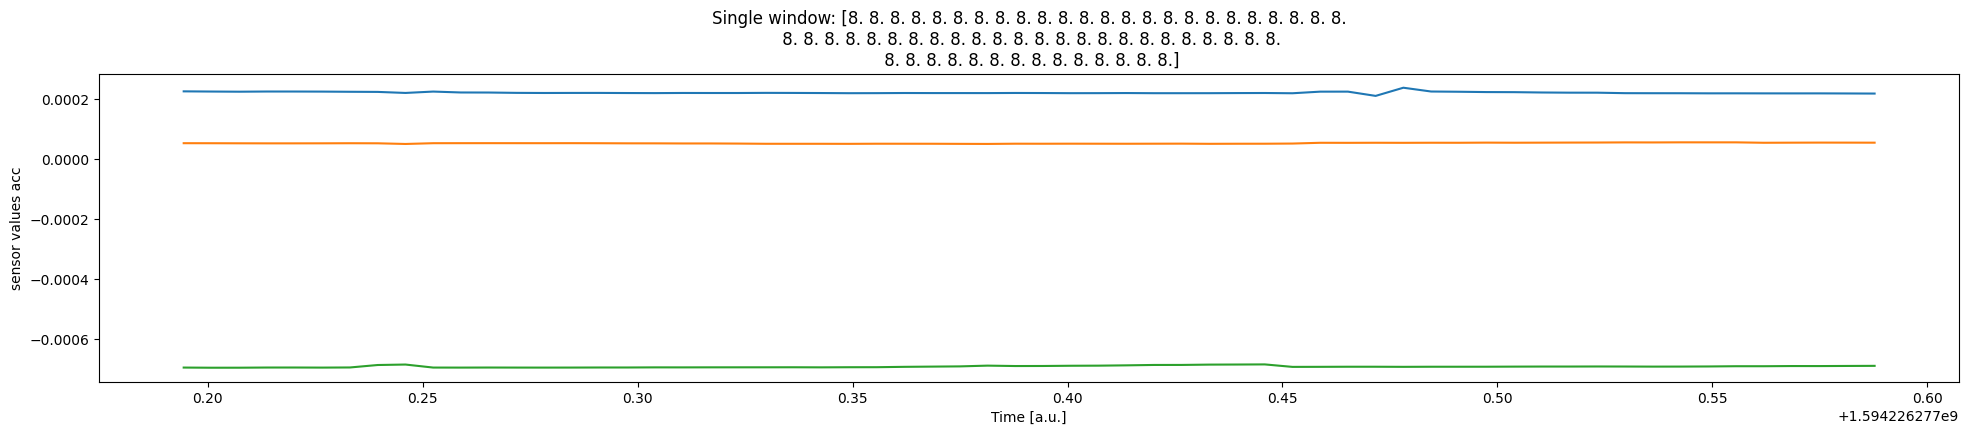

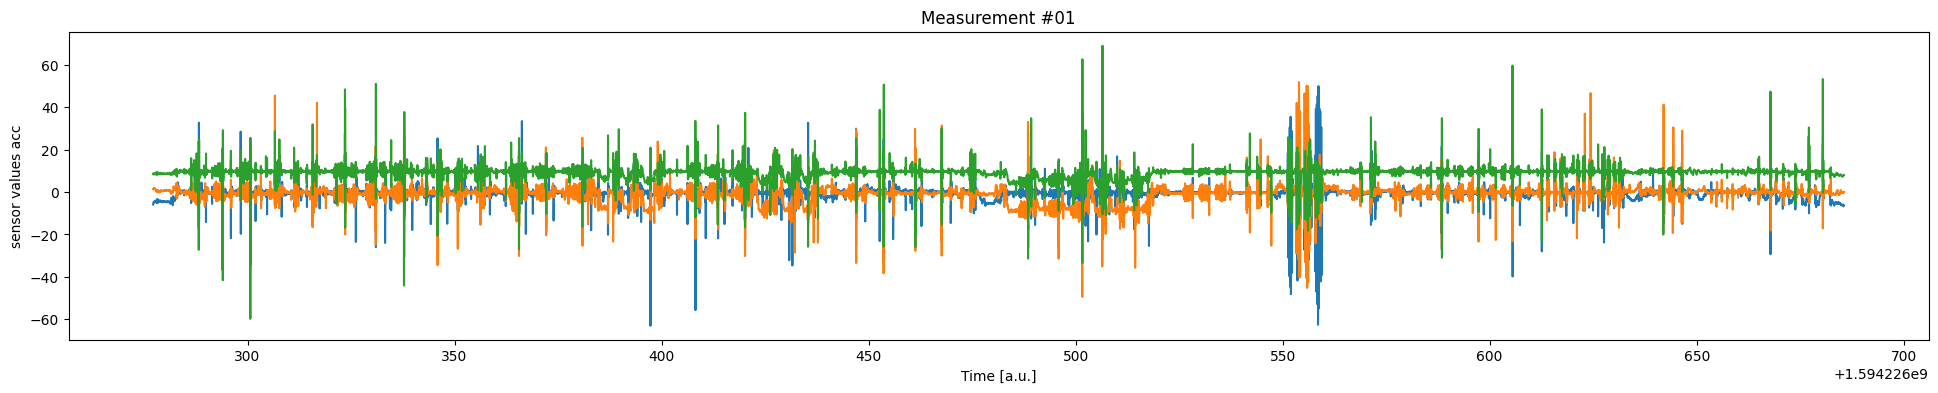

In [23]:
import matplotlib.pyplot as plt

# plot a sample
plt.figure(figsize=(24,4))
plt.title(f"Single window: {y_mag[0]}") # 70 is the window
t = Xt_mag[0][:, 0] # timestamp
x_win = Xt_mag[0][:, 1:] # x,y,z axis values
plt.plot(t, x_win)
plt.xlabel('Time [a.u.]')
plt.ylabel('sensor values acc')
plt.show()

# plot a measurement
plotme = data_dict["01"].acc.ts
t = plotme[:, 0]
x_mea = plotme[:, 1:]
plt.figure(figsize=(24,4))
plt.title("Measurement #01")
plt.plot(t, x_mea)
plt.xlabel('Time [a.u.]')
plt.ylabel('sensor values acc')
plt.show()

## 3. Preprocess the Data

In [24]:
from fhgutils import filter_labels, one_label_per_window, summarize_labels

### 3.1 `filter_labels`
- filter out labels [-1]
- also filter out whole windows, in case there is no majority label 
- e.g. window length of 5, labels could be [1,1,1,1,0] -> okay. but if [1,1,0,0,2] -> discard window.

In [25]:
values, counts = np.unique(y_acc, return_counts=True)
print(f"Labels: {values}")
total_samples = 0
for val, count in zip(values, counts):
    print(f"[INFO] label {val} with {count} samples")
    total_samples += count
print(f"Total Samples: {total_samples}")

Labels: [ 2.  3.  4.  5.  6.  7.  8. 14.]
[INFO] label 2.0 with 33998 samples
[INFO] label 3.0 with 14588 samples
[INFO] label 4.0 with 12588 samples
[INFO] label 5.0 with 5614 samples
[INFO] label 6.0 with 3097 samples
[INFO] label 7.0 with 3672 samples
[INFO] label 8.0 with 223675 samples
[INFO] label 14.0 with 633 samples
Total Samples: 297865


In [26]:
Xt_acc_f, Xc_acc_f, y_acc_f = filter_labels(labels=[-1], Xt=Xt_acc, Xc=Xc_acc, y=y_acc,name="Acc")
print("\n")
Xt_gyr_f, Xc_gyr_f, y_gyr_f = filter_labels(labels=[-1], Xt=Xt_gyr, Xc=Xc_gyr, y=y_gyr,name="GRR")
print("\n")
Xt_mag_f, Xc_mag_f, y_mag_f = filter_labels(labels=[-1], Xt=Xt_mag, Xc=Xc_mag, y=y_mag,name="MAG")
print("\n")
Xt_mic_f, Xc_mic_f, y_mic_f = filter_labels(labels=[-1], Xt=Xt_mic, Xc=Xc_mic, y=y_mic,name="MIC")


Acc
1271
3805
4065
4109
4149
6106
[INFO] original Xt: 7265 (41, 4)
[INFO] filtered Xt: 7259 (41, 4)


GRR
1271
3805
4065
4109
4149
6106
[INFO] original Xt: 7265 (41, 4)
[INFO] filtered Xt: 7259 (41, 4)


MAG
305
525
533
847
905
941
1011
1091
1157
1271
1465
1482
1517
1835
1902
2155
2535
2664
3293
3377
3397
3805
3813
4021
4065
4105
4109
4117
4149
4337
4363
4493
4789
5023
5077
5215
5225
5249
5339
5363
5615
5687
5758
5805
5913
6106
[INFO] original Xt: 7265 (62, 4)
[INFO] filtered Xt: 7219 (62, 4)


MIC
105
269
305
361
394
525
533
563
729
847
905
941
948
1011
1036
1091
1118
1154
1157
1271
1404
1421
1428
1482
1505
1517
1558
1604
1676
1764
1835
1902
1907
1967
1983
2043
2107
2133
2155
2323
2437
2489
2527
2535
2539
2601
2605
2875
3805
4065
4109
4149
4192
4363
4484
4616
4838
4928
5038
5238
5296
5456
5710
5756
5758
6012
6022
6106
6200
6504
6520
6547
6616
6697
6837
6842
6846
6931
6942
6986
[INFO] original Xt: 7265 (3200, 2)
[INFO] filtered Xt: 7185 (3200, 2)


### 3.2 `one_label_per_window`
- flatten labels of windows to the majority label
- `[1,1,1,1,2]` -> 1. bad if you've got `[0,0,0,0,0,1,1,1,1,1,1]` -> 1, this creates anomalous samples of class 1

In [27]:
print(Xt_acc_f[7])
print(y_acc_f[7])
print("pre", y_acc_f[7])
y_acc_f = one_label_per_window(y=y_acc_f)
y_gyr_f = one_label_per_window(y=y_gyr_f)
y_mag_f = one_label_per_window(y=y_mag_f)
y_mic_f = one_label_per_window(y=y_mic_f)
print("post", y_acc_f[7])

[[ 1.59422785e+09 -4.76286029e-01 -3.11918665e-01  9.70580078e+00]
 [ 1.59422785e+09 -3.44056559e-01 -2.09478103e-01  9.69982900e+00]
 [ 1.59422785e+09 -4.06092916e-01 -2.85171931e-01  9.47102835e+00]
 [ 1.59422785e+09 -1.84237740e-01 -4.45455807e-01  9.47702051e+00]
 [ 1.59422785e+09 -2.87838435e-01 -8.59770509e-01  9.72111005e+00]
 [ 1.59422785e+09 -2.98294310e-01 -1.14706250e+00  9.69943241e+00]
 [ 1.59422785e+09 -3.60678278e-01 -1.10351994e+00  9.82162155e+00]
 [ 1.59422785e+09 -2.47223860e-01 -9.96489505e-01  9.88782025e+00]
 [ 1.59422785e+09 -1.26396403e-01 -8.75706955e-01  9.97513526e+00]
 [ 1.59422785e+09 -1.26526634e-01 -7.47798805e-01  9.96346545e+00]
 [ 1.59422785e+09 -2.87770381e-01 -7.89382169e-01  9.87148047e+00]
 [ 1.59422785e+09 -1.85882768e-01 -9.33644296e-01  9.92514674e+00]
 [ 1.59422785e+09 -4.17316061e-02 -9.95361962e-01  9.90773308e+00]
 [ 1.59422785e+09 -1.58853194e-01 -1.00773683e+00  9.93924338e+00]
 [ 1.59422785e+09 -3.37820701e-01 -9.50401761e-01  9.94262366e

In [28]:
import pandas as pd
from datetime import datetime, timezone

# Function to format timestamp as a readable string
def format_timestamp(ts):
    return datetime.fromtimestamp(ts, tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]

# Collect data for all windows
window_data = []

for i in range(len(Xt_mic_f)):
    start_ts = Xt_mic_f[i][0][0]
    end_ts = Xt_mic_f[i][-1][0]
    duration = end_ts - start_ts

    window_data.append({
        "Window": i,
        "Start_Timestamp": start_ts,
        "End_Timestamp": end_ts,
        "Start_Time_UTC": format_timestamp(start_ts),
        "End_Time_UTC": format_timestamp(end_ts),
        "Duration_sec": round(duration, 4),
        "label": y_mic_f[i]
    })

# Create DataFrame and save to CSV
df = pd.DataFrame(window_data)
csv_path = "microphone_window_times.csv"
df.to_csv(csv_path, index=False)

print(f"[INFO] Saved window timestamp data to {csv_path}")


[INFO] Saved window timestamp data to microphone_window_times.csv


### 3.3 `summarize_labels`
- some labels are basically very similar, like "pull_trigger, pull_trigger_air" for the Pneumatic Rivet Gun
- same action, but once holding the tool in the air, once using it on a workpiece.

In [29]:
# To group multiple labels into one, so you can simplify the label space.
summarylabels = {5: [2, 1]} # Replace all occurrences of labels 0 and 1 with 5
y_acc_f_sum = summarize_labels(y_acc, summarylabels)

[INFO] Summarized labels from [ 2.  3.  4.  5.  6.  7.  8. 14.] to [ 3.  4.  5.  6.  7.  8. 14.]
